<a href="https://colab.research.google.com/github/vaishnavi-1/Electricity-theft-detection-using-ML/blob/main/final_8020_etd_svm2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ln -s /content/drive/My\ Drive/ /mydrive

# Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_final.csv')

In [ ]:
df.drop(['Unnamed: 0'],axis =1,inplace=True)


In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,1025,1026,1027,1028,1029,1030,1031,1032,1033,OutPut
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,9.96,16.92,7.60,24.324,18.05,24.324,18.750,17.840,14.920,1
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000,1
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000,1
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,9.99,11.78,18.59,24.180,18.57,14.590,12.820,19.370,15.920,1
4,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,10.37,15.32,13.51,12.230,14.68,15.636,15.636,15.636,15.636,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33836,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.53,2.09,3.23,2.790,2.70,2.840,3.070,2.370,2.430,0
33837,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,17.20,10.86,9.01,13.240,8.52,7.710,7.360,6.960,7.880,0
33838,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.23,3.64,4.13,4.550,3.39,3.160,4.030,3.520,4.860,0
33839,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000,0


In [ ]:
data = df[1000:10000]
#data.drop(['Unnamed: 0'],axis =1,inplace=True)
data.to_csv('test_data.csv')

In [ ]:
Y = data['OutPut']
data.drop(['OutPut'],axis=1,inplace=True)

<ipython-input-9-597df0ed2d88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(['OutPut'],axis=1,inplace=True)


##Full data

In [ ]:
Y = df['OutPut']
df.drop(['OutPut'],axis=1,inplace=True)

###Actual Theft users

In [ ]:
#Count no of 1 in Y
count = 0;
for i in Y:
  if(i==1):
    count = count+1
print(count)


3615


###Actual normal users

In [ ]:
# Count no of 0 in Y
len(Y)-count

30226

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,10.120,9.96,16.92,7.60,24.324,18.05,24.324,18.750,17.840,14.920
1,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000
2,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000
3,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,6.500,9.99,11.78,18.59,24.180,18.57,14.590,12.820,19.370,15.920
4,2.9,3.42,3.81,4.58,3.56,4.25,3.86,3.53,3.41,0.85,...,15.636,10.37,15.32,13.51,12.230,14.68,15.636,15.636,15.636,15.636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33836,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,2.330,2.53,2.09,3.23,2.790,2.70,2.840,3.070,2.370,2.430
33837,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,9.480,17.20,10.86,9.01,13.240,8.52,7.710,7.360,6.960,7.880
33838,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,5.590,5.23,3.64,4.13,4.550,3.39,3.160,4.030,3.520,4.860
33839,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.00,0.00,0.00,0.000,0.00,0.000,0.000,0.000,0.000


In [ ]:
abn_x = df.iloc[4]
nor_x = df.iloc[33837]

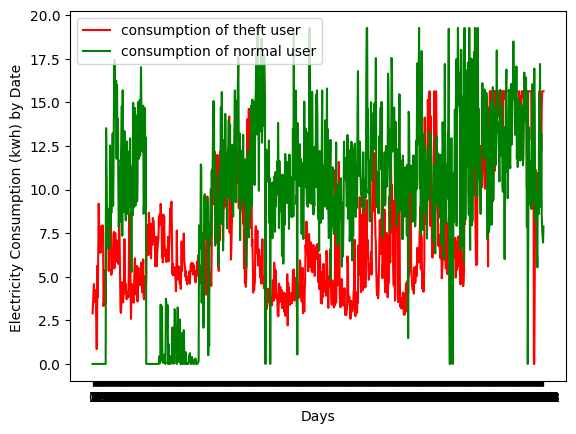

<Figure size 30000x30000 with 0 Axes>

<Figure size 30000x30000 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(abn_x,'r-',label='consumption of theft user')
plt.plot(nor_x,'g-', label='consumption of normal user')
plt.xlabel('Days')
plt.ylabel('Electricity Consumption (kwh) by Date ')
plt.legend()
plt.show()

plt.figure(figsize=(300,300))


# Split the data intro training and testing set

In [ ]:
x = np.array(df)
y = np.array(Y)

In [ ]:
print(x.shape)
print(y.shape)

(33841, 1034)
(33841,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(27072, 1034)
(27072,)
(6769, 1034)
(6769,)


In [ ]:
from sklearn import svm

In [ ]:
clf = svm.SVC()
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.8936327374796869

In [ ]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      6038
           1       0.74      0.02      0.05       731

    accuracy                           0.89      6769
   macro avg       0.82      0.51      0.49      6769
weighted avg       0.88      0.89      0.85      6769



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8936327374796869

In [ ]:
# Search best hyperparameters: GridSearchCV
# GridSearchCV accepts dictionary where different hyper-parameters we want to try on the SVM model.
from sklearn.model_selection import GridSearchCV
kernels = list([ 'rbf', 'sigmoid'])
c = list([ 1, 10, 1e2])



param_grid = dict(kernel=kernels, C=c)
grid = GridSearchCV(clf, param_grid, cv=10, return_train_score=False)
grid.fit(x_train,y_train)


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [1, 10, 100.0], 'kernel': ['rbf', 'sigmoid']})

In [ ]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)

{'C': 100.0, 'kernel': 'rbf'}
SVC(C=100.0)


In [ ]:
clf = svm.SVC(C=100,kernel="rbf",degree =10,probability=True)
clf.fit(x_train, y_train)
clf.score(x_test,y_test)

0.8970305805879746

#Save model

In [ ]:
from joblib import dump, load
dump(clf, 'SVM.joblib')

['SVM.joblib']

In [ ]:
!cp 'final_SVM.joblib' '/content/drive/MyDrive/final_SVM.joblib'

cp: cannot stat 'final_SVM.joblib': No such file or directory


In [ ]:
#Normalised False give no of correctly clasify sample
#Normalised True give percentage accuracy
count = accuracy_score(y_test, y_pred, normalize=False)

In [ ]:
print('No of correctly classify sample ',count, ' out of ',len(y_test))


No of correctly classify sample  6049  out of  6769


##Performance evaluation

In [ ]:
import sklearn
print(sklearn.__version__)


1.2.2


In [ ]:
!pip install --upgrade scikit-learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

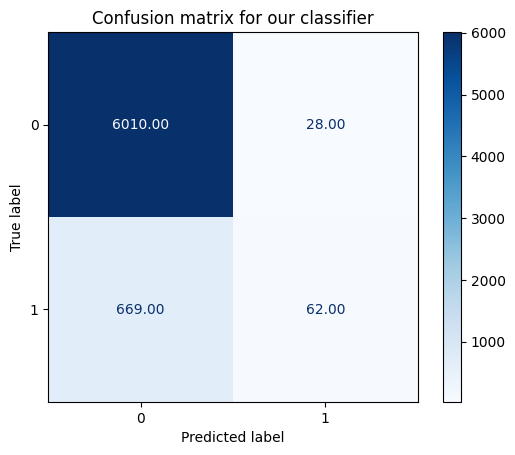

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
y_pred = clf.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Confusion matrix for our classifier')
plt.show()


In [ ]:
y_pred = clf.predict(x_test)

In [ ]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

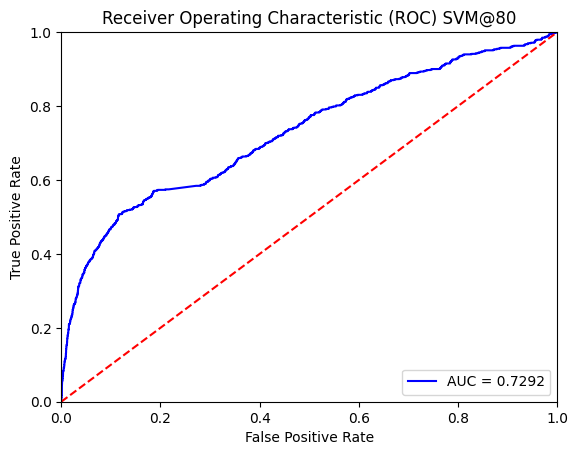

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
probs = clf.predict_proba(x_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic (ROC) SVM@80')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()